In [171]:
import os
import csv
from email.parser import BytesParser, Parser
from email.policy import default
import numpy as np
import pandas as pd
import sys

In [172]:
def send_email_features_to_csv(emails, csvFileName):
    with open(csvFileName, 'w', newline='') as fp:
        writer = csv.writer(fp)
        
        # header row
        writer.writerow(["To","Body"])
        
        # define max & count
        
        for filename in os.listdir(emails):
            try:
                if (filename.endswith('.txt')):
                    # read each file as binary 
                    with open(os.path.join(emails, filename), 'rb') as fp:

                        # define message object
                        msg = BytesParser(policy=default).parse(fp)
                        to_ = msg.get('to')

                        # parse features
                        
                        body_ = msg.get_body(preferencelist=('plain')).get_content()
                       

                        # Write the row to the csv file
                        writer.writerow([to_,body_])
            except:
                pass

In [173]:
#Get all of the files from the spam and ham directory
hamPath = "data/ham_text/"
spamPath = "data/spam_text/"

In [174]:
send_email_features_to_csv(hamPath, "allHamData.csv")
send_email_features_to_csv(spamPath, "allSpamData.csv")

## HAM DATA SET UP

In [175]:
emailHamData = pd.read_csv('allHamData.csv')

In [176]:
emailHamData.shape # Check the size of the dataset

(1783, 2)

In [177]:
emailHamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      1766 non-null   object
 1   Body    1783 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [178]:
emailHamData.head()

,To,Body
0,ilug@linux.ie,"On Tue, Aug 13, 2002 at 12:22:14PM +0100, Nial..."
1,fork@spamassassin.taint.org,Lucas Gonze:\n>Spam is *the* tool for dissiden...
2,zzzzteana@yahoogroups.com,\n\nhttp://www.thisislocallondon.co.uk/news/we...
3,zzzzteana@yahoogroups.com,Tom R:\n> http://www.cliktrik.com/people/famil...
4,fork@spamassassin.taint.org,JoeBar wrote:\n>C is more reliable than Java??...


In [179]:
#Remove any all duplicates in emails data
emailHamData = emailHamData.drop_duplicates(subset=['Body'])

In [180]:
emailHamData.shape # Check the size of the dataset

(1286, 2)

In [181]:
emailHamData["Label"] = 0

### Spam Data setup

In [182]:
emailSpamData = pd.read_csv('allSpamData.csv')

In [183]:
emailSpamData.shape # Check the size of the dataset

(89, 2)

In [184]:
emailSpamData.info() # Check to see if there are missing values (NaN or null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   To      88 non-null     object
 1   Body    89 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [185]:
emailSpamData.head()

,To,Body
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second..."
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...


In [186]:
#Remove any all duplicates in emails data
emailSpamData = emailSpamData.drop_duplicates(subset=['Body'])

In [187]:
emailSpamData["Label"] = 1

In [188]:
emailSpamData.shape # Check the size of the dataset

(86, 3)

In [189]:
from sklearn.utils import shuffle
#hamEmails = shuffle(hamEmails).reset_index()
totalEmailsNeeded = len(emailSpamData)-1

emailHamData = shuffle(emailHamData)
emailHamData = emailHamData.reset_index()
emailHamData = emailHamData.drop(["index"], axis=1)
emailHamData = emailHamData.loc[0:totalEmailsNeeded, :]
emailHamData

emailSpamData = emailSpamData.reset_index()
emailSpamData = emailSpamData.drop(["index"], axis=1)
emailSpamData

,To,Body,Label
0,bruce@untroubled.org,\n\n\n\n1 'Trick' Reverses Nerve Pain? -Try To...,1
1,bruce@untroubled.org,\n\n\nCongratulations - Details Apply\n\nhttp:...,1
2,bruce@untroubled.org,\n\n\nFLASH SALE! $9.99 for 11x14 Custom Canva...,1
3,bruce@untroubled.org,"\n\n\n\nHey,\n\nWhat if it only took 35-second...",1
4,bruce@untroubled.org,\n\nSpecial Offer!\n\nCongratulations!\nhttp:/...,1
...,...,...,...
81,bruce@untroubled.org,"\n\nDear Patriot,\n\nI just got word that we h...",1
82,bruce@untroubled.org,\n\n\nYou wake up...\nhttp://www.translator-di...,1
83,bruce@untroubled.org,\nTime is running out to become a part of the...,1
84,bruce@untroubled.org,"\n\n\nThanks to this Harvard experiment, 5,683...",1


### Combine datasets

In [190]:
allEmails = [emailHamData, emailSpamData]

In [191]:
allEmails = pd.concat([emailHamData,emailSpamData], ignore_index=True)
allEmails.shape

(172, 3)

## Separate the features (x) from the labels (y)

In [192]:
# Separate the features (x) from the labels (y)
x = allEmails['Body']
y = allEmails["Label"]

In [193]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction import text

stList = text.ENGLISH_STOP_WORDS
stList = list(stList)

ourStopWords = ['www', 'com', 'php', 'https', 'xml','org','uk', 'net', 'like', 'html', 'http', 'index',
            'hml', 'htm', 'just', 'know', 'yahoo', 've', 'way', 'linux', 'said', 'day', 'time', 'ca', 'url', 
            'did', 'bruce']

stopWords = ourStopWords + stList
         

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents= "unicode", stop_words=stopWords, max_features=80) # This cuts the features to 40 words
features = cv.fit_transform(x)
features.get_shape()



(172, 80)

In [195]:
columns = cv.get_feature_names_out()

# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.250000,0.418605,0.220930,0.232558,0.372093,0.186047,0.180233,0.255814,0.191860,0.412791,...,0.250000,0.180233,0.354651,0.308140,0.319767,0.238372,0.250000,0.325581,0.267442,0.215116
std,0.892627,1.048141,0.590394,0.767382,1.307169,0.640022,0.526562,0.881069,0.499524,2.714152,...,0.899155,0.526562,0.754582,0.736153,0.889881,1.235978,1.499025,0.829879,0.570717,0.607173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,5.000000,4.000000,10.000000,6.000000,3.000000,6.000000,2.000000,35.000000,...,6.000000,2.000000,4.000000,4.000000,6.000000,11.000000,11.000000,4.000000,3.000000,3.000000


In [196]:
# Checking to make sure that there are no NaN's
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [197]:
x.columns = columns
#x = x.drop(["gt", "lt"], axis=1) # In the dataset we are using, &gt;  and &lt; are less than or greater than signs in html - not words
x.describe()

,000,10,12,13,14,15,16,18,19,20,...,united,unsubscribe,use,users,want,week,word,world,wrote,years
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.250000,0.418605,0.220930,0.232558,0.372093,0.186047,0.180233,0.255814,0.191860,0.412791,...,0.250000,0.180233,0.354651,0.308140,0.319767,0.238372,0.250000,0.325581,0.267442,0.215116
std,0.892627,1.048141,0.590394,0.767382,1.307169,0.640022,0.526562,0.881069,0.499524,2.714152,...,0.899155,0.526562,0.754582,0.736153,0.889881,1.235978,1.499025,0.829879,0.570717,0.607173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,5.000000,4.000000,10.000000,6.000000,3.000000,6.000000,2.000000,35.000000,...,6.000000,2.000000,4.000000,4.000000,6.000000,11.000000,11.000000,4.000000,3.000000,3.000000


In [198]:
columns

array(['000', '10', '12', '13', '14', '15', '16', '18', '19', '20',
       '2002', '21', '30', '33995', 'business', 'campaigns', 'click',
       'clickthru', 'company', 'control', 'design', 'don', 'email', 'end',
       'flight', 'free', 'god', 'good', 'got', 'group', 'heaven', 'help',
       'high', 'home', 'iiu', 'ilug', 'image', 'info', 'information',
       'internet', 'irish', 'islands', 'jesus', 'law', 'list', 'listinfo',
       'mail', 'mailman', 'make', 'mark', 'need', 'new', 'number',
       'online', 'os', 'people', 'razor', 'receive', 'rest', 'risk',
       'shall', 'space', 'states', 'subject', 'subscription', 'taint',
       'things', 'think', 'today', 'track', 'united', 'unsubscribe',
       'use', 'users', 'want', 'week', 'word', 'world', 'wrote', 'years'],
      dtype=object)

In [199]:
x.max()

000       6
10        6
12        5
13        4
14       10
         ..
week     11
word     11
world     4
wrote     3
years     3
Length: 80, dtype: int64

In [200]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [201]:
#Mean Center data
x = x-np.mean(x,axis=0)

In [202]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

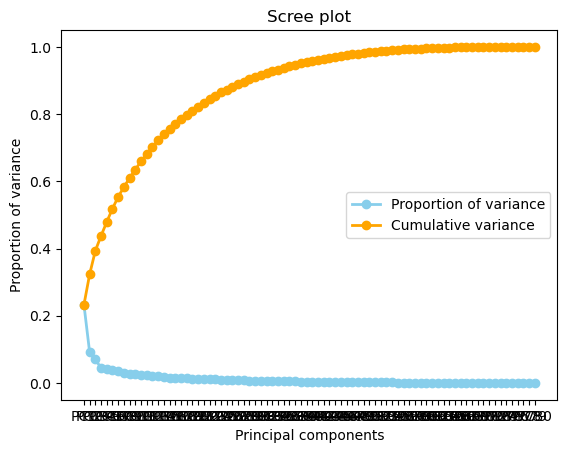

In [203]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [204]:
display(prop_var)

[0.2326921815765214,
 0.09085581108012453,
 0.07003202856817364,
 0.04427112872036466,
 0.041386612899610625,
 0.03971867283057099,
 0.034664733424593024,
 0.02958171419420649,
 0.026491534106191848,
 0.02540469598583834,
 0.024089151528853235,
 0.022223954249025686,
 0.02103971050176244,
 0.019157958445479014,
 0.018743429479819728,
 0.015629137630746873,
 0.014560526984029435,
 0.014106580764323584,
 0.013357448151308886,
 0.012656401519871997,
 0.011925289527603328,
 0.011333485128188676,
 0.010662956813830296,
 0.010198378222529496,
 0.00958836963965181,
 0.008858731028537407,
 0.008422674158417154,
 0.007401880732413313,
 0.007261246756706856,
 0.0070554667136380035,
 0.006449141355179913,
 0.005907025391065599,
 0.005758980279566733,
 0.005519428434174545,
 0.005328423132480247,
 0.005067397007745543,
 0.004782581306863446,
 0.004358266824195458,
 0.004233571588871423,
 0.0038947787683686575,
 0.0037276315124067376,
 0.003507982016653618,
 0.0031957712347553706,
 0.00304635604299

In [205]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
x = pd.DataFrame(x)
x.columns = columns
x

,000,10,12,13,14,15,16,18,19,20,...,united,unsubscribe,use,users,want,week,word,world,wrote,years
0,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,-0.09593,-0.011794,...,-0.041667,0.909884,0.161337,-0.077035,-0.053295,-0.021670,-0.022727,-0.081395,-0.089147,-0.071705
1,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,0.40407,-0.011794,...,-0.041667,-0.090116,-0.088663,0.172965,-0.053295,-0.021670,-0.022727,-0.081395,0.244186,-0.071705
2,-0.041667,0.596899,0.155814,-0.05814,0.062791,-0.031008,0.273256,-0.042636,-0.09593,-0.011794,...,-0.041667,0.909884,-0.088663,-0.077035,0.946705,0.887421,-0.022727,-0.081395,-0.089147,-0.071705
3,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,-0.09593,-0.011794,...,-0.041667,-0.090116,-0.088663,0.672965,-0.053295,-0.021670,-0.022727,-0.081395,-0.089147,-0.071705
4,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,-0.09593,-0.011794,...,-0.041667,-0.090116,-0.088663,0.172965,-0.053295,-0.021670,-0.022727,-0.081395,0.244186,-0.071705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,-0.09593,0.016777,...,-0.041667,-0.090116,-0.088663,-0.077035,-0.053295,-0.021670,0.068182,-0.081395,-0.089147,-0.071705
168,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,0.124031,0.90407,-0.011794,...,-0.041667,-0.090116,-0.088663,-0.077035,-0.053295,-0.021670,-0.022727,-0.081395,-0.089147,0.261628
169,-0.041667,-0.069767,-0.044186,-0.05814,-0.037209,-0.031008,-0.060078,-0.042636,-0.09593,-0.011794,...,-0.041667,-0.090116,-0.088663,-0.077035,-0.053295,0.069239,-0.022727,-0.081395,-0.089147,-0.071705
170,-0.041667,-0.069767,0.155814,-0.05814,-0.037209,-0.031008,0.273256,-0.042636,-0.09593,-0.011794,...,-0.041667,-0.090116,-0.088663,-0.077035,-0.053295,-0.021670,-0.022727,-0.081395,-0.089147,0.261628


In [206]:
nfeatures = len(x.columns);
nfeatures

80

In [207]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 

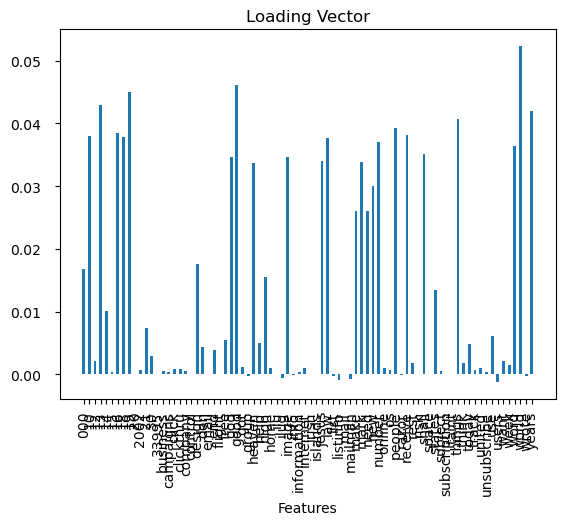

In [208]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel

# bar(columns, Vsquare[:][38], 0.5); # CHANGED FROM 1.5 TO 1.0
# grid; 
# xlabel('Feature index')
# ylabel('Importance of feature')
# title("Loading Vector")

y_pos = np.arange(len(columns))
fig, ax = plt.subplots()

ax.bar(columns, Vsquare[:][0], 0.5, linewidth = 1000)
ax.set_xticks(columns)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_xticklabels(columns, rotation=90)
ax.set_xlabel('Features')
ax.set_title('Loading Vector')

plt.show() 